In [1]:
from tensorflow import keras

# Load fashion_mnist dataset
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print('The first train image before normalization: \n',train_images[0])

The first train image before normalization: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0 

In [4]:
# Scale the value to [0,1]
train_images=train_images/255
test_images=test_images/255
 
print('The first train image after normalization: \n',train_images[0])

The first train image after normalization: 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        

In [5]:
import tensorflow as tf

# Number of node in each layer
n_hidden1=512
n_hidden2=128
n_classes=10

# Build a model using Keras Sequential
model=keras.Sequential()

# Add a Flatten layer to the model
model.add(keras.layers.Flatten(input_shape=train_images[0].shape))

# Add the first Hidden layer
model.add(keras.layers.Dense(n_hidden1,activation=tf.nn.relu))

# Add the second Hidden layer
model.add(keras.layers.Dense(n_hidden2,activation=tf.nn.relu))

# Add the Output layer
model.add(keras.layers.Dense(n_classes,activation=tf.nn.softmax))



In [6]:
# Compile the model using Adam Optimizer
adam_optimizer= keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels,validation_split=0.3, epochs=50)

Epoch 1/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.5001 - accuracy: 0.8197 - val_loss: 0.4472 - val_accuracy: 0.8314
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3741 - accuracy: 0.8619 - val_loss: 0.3849 - val_accuracy: 0.8571
Epoch 3/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3342 - accuracy: 0.8763 - val_loss: 0.3639 - val_accuracy: 0.8706
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.8840 - val_loss: 0.3762 - val_accuracy: 0.8645
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2885 - accuracy: 0.8905 - val_loss: 0.3362 - val_accuracy: 0.8789
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2735 - accuracy: 0.8974 - val_loss: 0.3272 - val_accuracy: 0.8866
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2615 - accuracy: 0.9013 - val_loss: 0.3281 - val_accuracy:

In [8]:
# Stop training if 'val_loss' stops improving for over 10 epochs
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1)
 
# Save the best model to .h5 file
best_model=keras.callbacks.ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True,verbose=1)
 
# Start training
model.fit(train_images, train_labels, validation_split=0.3, epochs=10, callbacks=[early_stopping,best_model])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0763 - accuracy: 0.9712 - val_loss: 0.6753 - val_accuracy: 0.8927

Epoch 00001: val_loss improved from inf to 0.67527, saving model to best_model.h5
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0723 - accuracy: 0.9725 - val_loss: 0.6562 - val_accuracy: 0.8927

Epoch 00002: val_loss improved from 0.67527 to 0.65624, saving model to best_model.h5
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0733 - accuracy: 0.9727 - val_loss: 0.6392 - val_accuracy: 0.8930

Epoch 00003: val_loss improved from 0.65624 to 0.63917, saving model to best_model.h5
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0755 - accuracy: 0.9708 - val_loss: 0.7242 - val_accuracy: 0.8895

Epoch 00004: val_loss did not improve from 0.63917
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0647 - accuracy: 0.9752 - val_loss: 0

In [9]:
# Load the best model
model=keras.models.load_model(filepath='best_model.h5')
 
# Evaluate the model using test set
test_loss, test_accuracy=model.evaluate(test_images,test_labels)
print('Test accuracy: ',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.7311 - accuracy: 0.8852
Test accuracy:  0.885200023651123


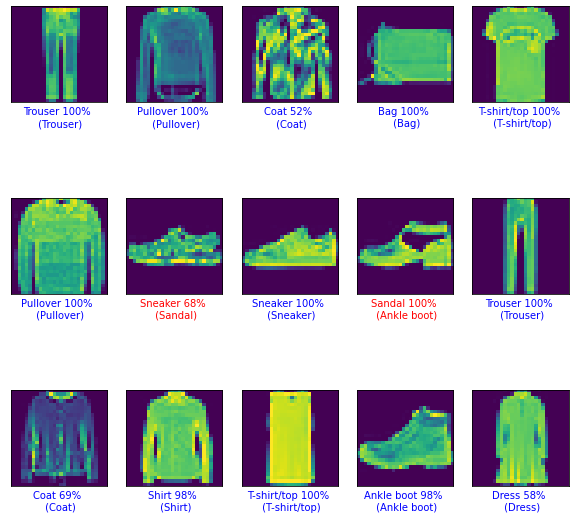

In [10]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
# Make prediction
preds=model.predict(test_images)
 
# Take the highest value as the predicted class
pred_label=np.argmax(preds,axis=1)
 
# Display the first 15 images of the predictions
plt.figure(figsize=(10,10))
for i in range(15,30):
  plt.subplot(3,5,i-14)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i])
  
  # Set the blue color if the prediction is correct
  # Otherwise, diesplay red colour
  if pred_label[i] == test_labels[i]:
    color = 'blue'
  else:
    color = 'red'
  
  # Display the prediction
  plt.xlabel("{} {:2.0f}% \n ({})".format(class_names[pred_label[i]],
                                100*np.max(preds[i]),
                                class_names[test_labels[i]]),
                                color=color)